In [1]:
import seaborn as sns
from patsy import dmatrix, dmatrices

In [2]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [3]:
dmatrix('survived + pclass +  age + 0', titanic)[:5]

array([[ 0.,  3., 22.],
       [ 1.,  1., 38.],
       [ 1.,  3., 26.],
       [ 1.,  1., 35.],
       [ 0.,  3., 35.]])

In [4]:
dmatrix('survived + pclass +  survived:pclass + 0', titanic)[:5]  #상호작용

array([[0., 3., 0.],
       [1., 1., 1.],
       [1., 3., 3.],
       [1., 1., 1.],
       [0., 3., 0.]])

In [5]:
dmatrix('survived + pclass +  I(survived+pclass) + 0', titanic)[:5]  #임의연산

array([[0., 3., 3.],
       [1., 1., 2.],
       [1., 3., 4.],
       [1., 1., 2.],
       [0., 3., 3.]])

In [6]:
def ten_times(x):
    return x * 10
dmatrix('survived + pclass +  ten_times(age) + 0', titanic)[:5]  #임의연산

array([[  0.,   3., 220.],
       [  1.,   1., 380.],
       [  1.,   3., 260.],
       [  1.,   1., 350.],
       [  0.,   3., 350.]])

In [7]:
import numpy as np
X = np.arange(7).reshape(-1, 1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)  # 평균0, 표준편차1 스케일링

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [10]:
X2 = np.vstack([X, 1000])
scaler.fit_transform(X2)  # 아웃라이어가 존재하면 결과 이상

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X2) #중앙값=0, IQR=1

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


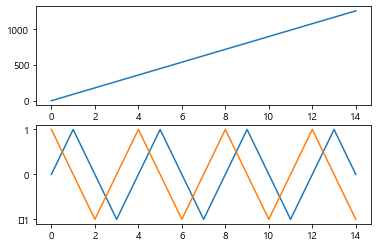

In [21]:
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt

X = 90 * np.arange(15).reshape(-1,1)
 # 회귀분석시 인자가 각도일 경우 사용되는 중요한 트릭
def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1]) 
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)   

plt.subplot(211)
plt.plot(X)
plt.subplot(212)
plt.plot(X2)

plt.show()